In [1]:
from analysis import *
from Db import DBManager

items = DBManager._getItems(30000)

C:\Users\Luiz Fernando\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Status: 200


Processando itens: 100%|██████████| 19383/19383 [00:23<00:00, 818.05it/s] 


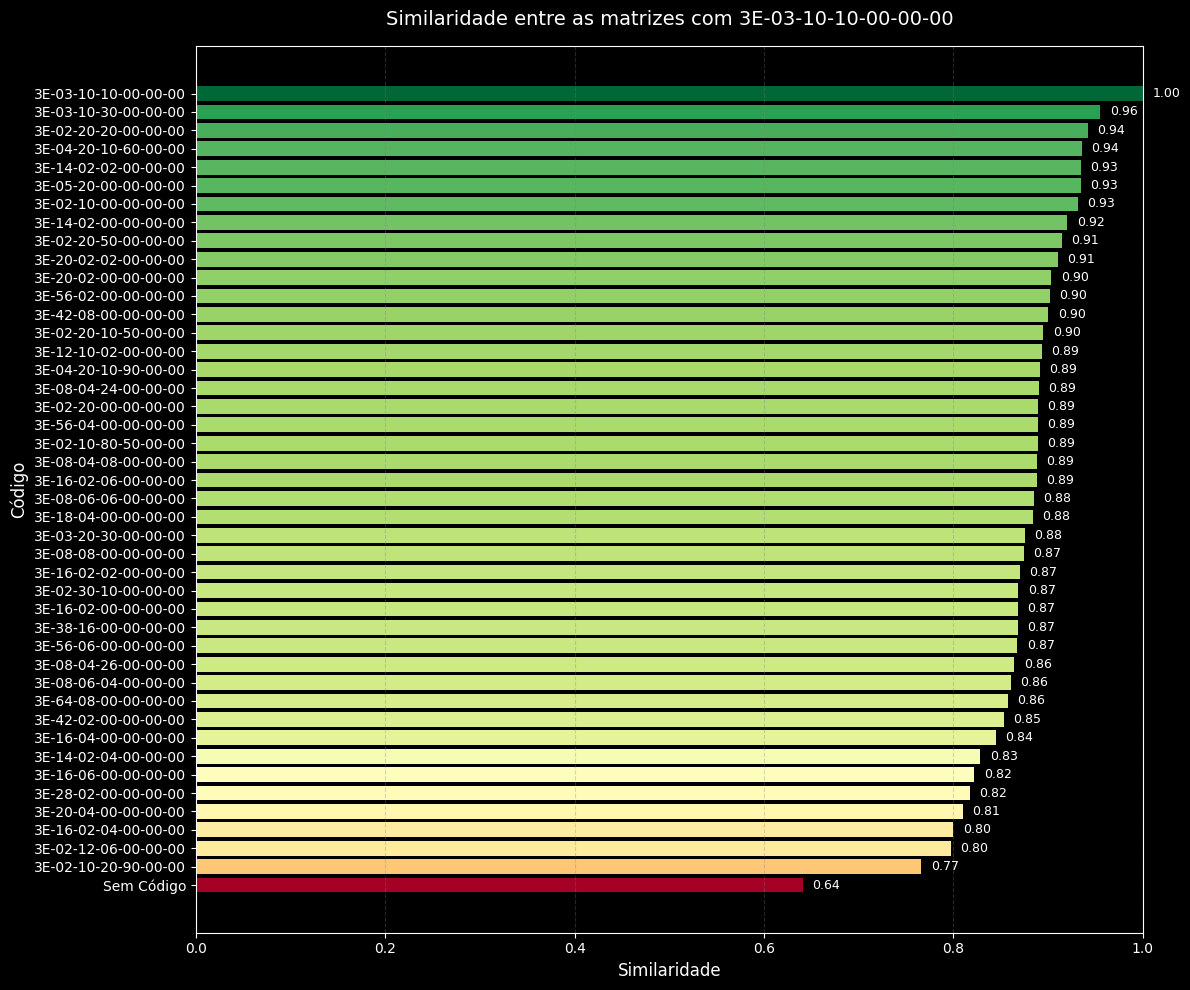

In [9]:
comuns = ComumPropsPerCode(10000, items)

from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-mpnet-base-v2")

info = EmbeddingMatriz(comuns, model)

keys = list(info.keys())
test_key = keys[0]

similarity = SimilarityDict(info[test_key], info, skip_same=True)

sorted_items = sorted(similarity.items(), key=lambda x: x[1], reverse=True)[:80]
codes, values = zip(*sorted_items)

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

cmap = plt.get_cmap('RdYlGn')
norm_values = (np.array(values) - min(values)) / (max(values) - min(values))
colors = [cmap(v) for v in norm_values]

plt.figure(figsize=(12, 10))
bars = plt.barh(codes, values, color=colors, edgecolor='none')

plt.xlim(0, 1)
plt.xlabel('Similaridade', color='white', fontsize=12)
plt.ylabel('Código', color='white', fontsize=12)
plt.title(f"Similaridade entre as matrizes com {test_key}",
          color='white', fontsize=14, pad=15)

plt.tick_params(colors='white', labelsize=10)
plt.grid(axis='x', color='gray', alpha=0.3, linestyle='--')

for bar, value in zip(bars, values):
    plt.text(value + 0.01, bar.get_y() + bar.get_height() / 2,
             f"{value:.2f}", va='center', fontsize=9, color='white')

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
